## Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from IPython.display import Image
%matplotlib inline

In [2]:
#pip install plotly_express

## Importing Dataset

In [3]:
dataset = pd.read_csv('../Datasets/district_wise.csv')

In [4]:
dt = dataset.drop(['SlNo','State_Code','State','District_Key','District_Notes','Last_Updated'],axis=1)

In [5]:
X = dt.iloc[:,1:]

## Applying Kmeans Clustering

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y = kmeans.fit_predict(X)

## Assigning Different Zones

In [7]:
dataset['zone'] = y

In [8]:
dataset['zone'][dataset.zone == 0] = 'Red'

In [9]:
dataset['zone'][dataset.zone == 1] = 'Green'

In [10]:
dataset['zone'][dataset.zone == 2] = 'Orange'

In [11]:
dataset[dataset.District == 'Patna']

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated,zone
104,100,BR,Bihar,BR_Patna,Patna,36675,1761,34644,270,0,0,0,0,0,NaN,NaN,Orange


In [12]:
dataset['zone'].value_counts()

Red       742
Orange     53
Green       6
Name: zone, dtype: int64

In [14]:
df = pd.read_csv('../Datasets/states.csv')

In [15]:
g=df.groupby('State')

In [16]:
df_India = g.get_group('India')

In [17]:
df_Kerala = g.get_group('Kerala')
df_Kerala.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,30-01-2020,Kerala,1,0,0,0,NaN
2,02-02-2020,Kerala,2,0,0,0,NaN
4,03-02-2020,Kerala,3,0,0,0,NaN
6,14-02-2020,Kerala,3,3,0,0,NaN
9,02-03-2020,Kerala,3,3,0,0,NaN


## Visual Representation of the result

In [18]:
import seaborn as sns
df.corr()

,Confirmed,Recovered,Deceased,Other,Tested
Confirmed,1.000000,0.997017,0.981306,0.907173,0.983774
Recovered,0.997017,1.000000,0.970356,0.899836,0.985453
Deceased,0.981306,0.970356,1.000000,0.934457,0.944727
Other,0.907173,0.899836,0.934457,1.000000,0.865607
Tested,0.983774,0.985453,0.944727,0.865607,1.000000


<AxesSubplot:>

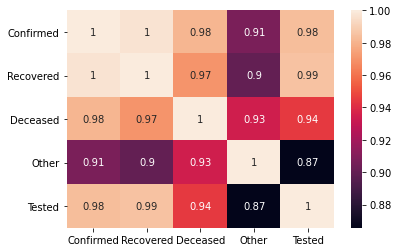

In [19]:
sns.heatmap(data=df.corr(),annot=True)

In [20]:
g=df.groupby('State')
df_India = g.get_group('India')

In [21]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 8425
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   State      253 non-null    object 
 2   Confirmed  253 non-null    int64  
 3   Recovered  253 non-null    int64  
 4   Deceased   253 non-null    int64  
 5   Other      253 non-null    int64  
 6   Tested     238 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 15.8+ KB


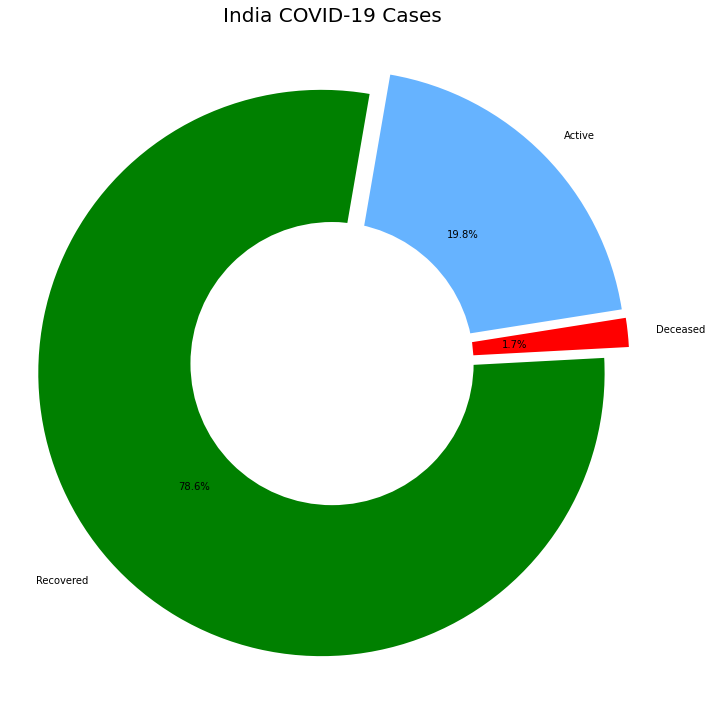

In [22]:
India_confirmed = df_India['Confirmed'].sum()
India_recovered = df_India['Recovered'].sum()
India_deaths = df_India['Deceased'].sum()
India_active = India_confirmed - (India_recovered - India_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [India_active,India_recovered,India_deaths]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.50,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [24]:
df_without_Ind = df[df['State']!='India']

In [57]:
fig = px.line(df_without_Ind, x='Date', y='Confirmed', color='State', title='India: State-wise cases')
fig.update_layout(hovermode='closest',template='seaborn',width=1000,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

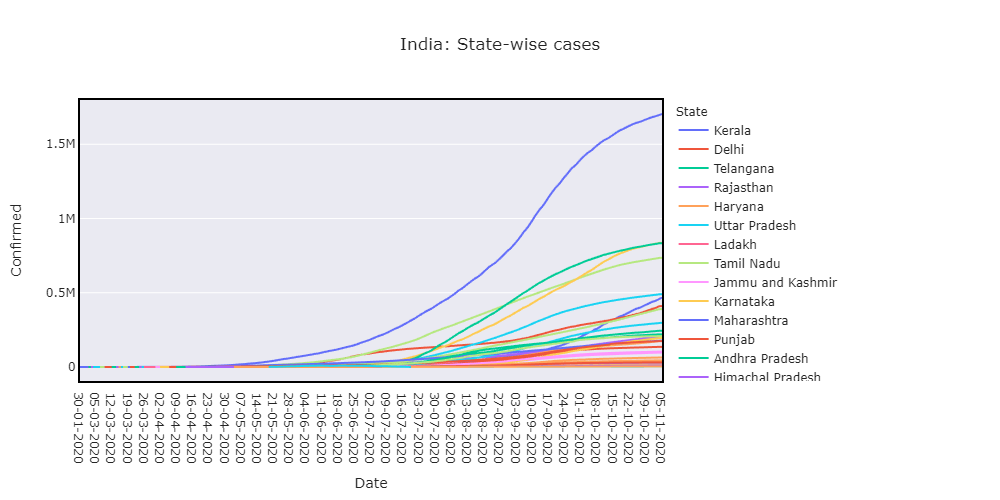

In [58]:
Image(pio.to_image(fig, format='png'))

In [59]:
#img_bytes = fig.to_image(format="png")

In [61]:
# from IPython.display import Image
# Image(img_bytes)

In [62]:
fig = px.line(df_without_Ind, x='Date', y='Recovered', color='State', title='India: State-wise recovered')
fig.update_layout(hovermode='closest',template='seaborn',width=1000,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

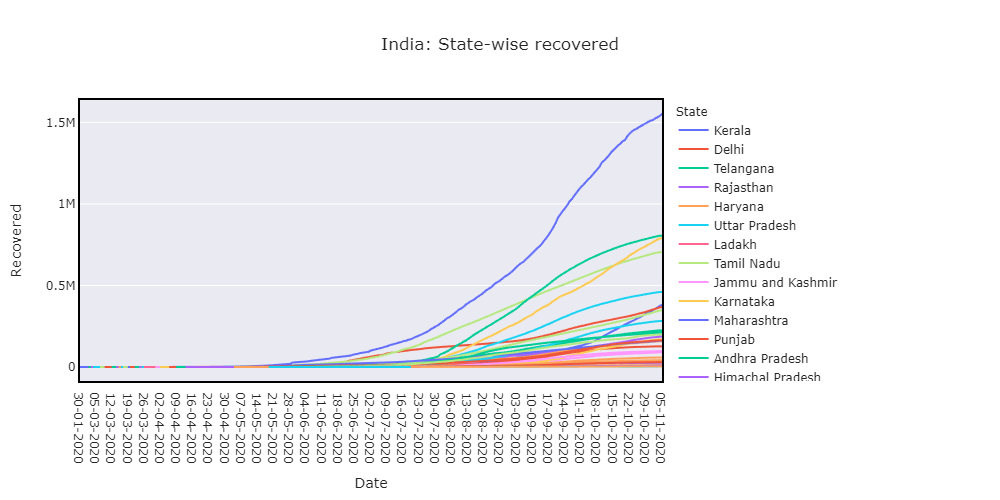

In [63]:
Image(pio.to_image(fig, format='png'))

In [64]:
fig = px.line(df_without_Ind, x='Date', y='Deceased', color='State', title='India: State-wise Death')
fig.update_layout(hovermode='closest',template='seaborn',width=1000,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

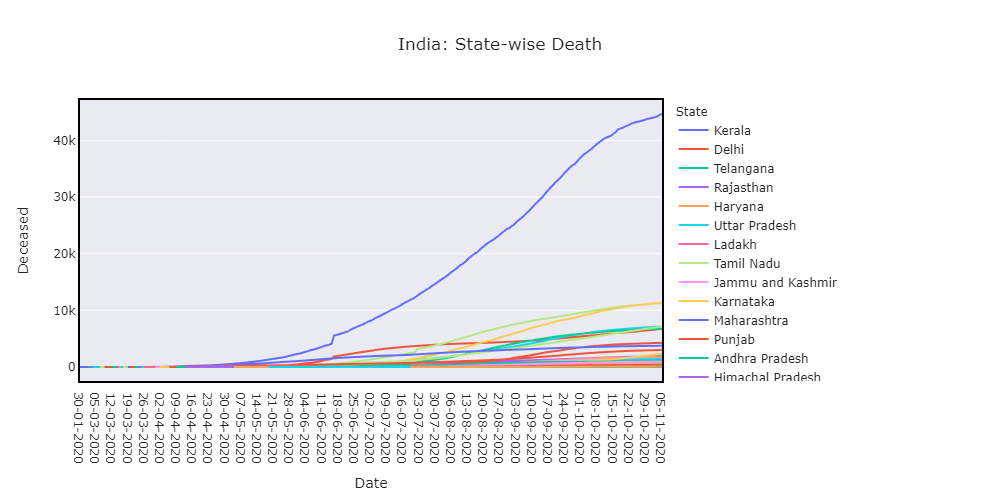

In [65]:
Image(pio.to_image(fig, format='png'))

In [28]:
df_without_Ind['Active'] = df_without_Ind['Confirmed'] - df_without_Ind['Recovered'] - df_without_Ind['Deceased']

In [66]:
fig = px.line(df_without_Ind, x='Date', y='Active', color='State', title='India: State-wise Active Cases')
fig.update_layout(hovermode='closest',template='seaborn',width=1000,xaxis=dict(mirror=True,linewidth=2,linecolor='black',showgrid=False),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

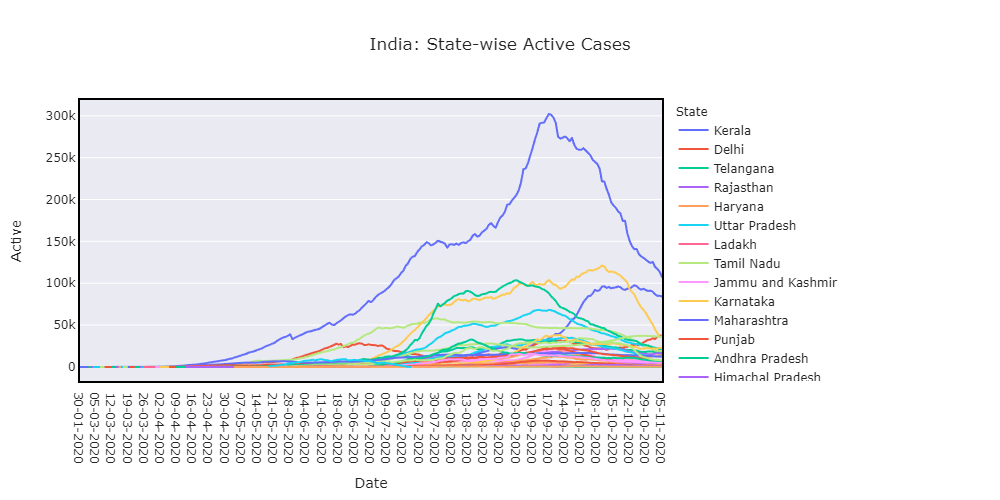

In [67]:
Image(pio.to_image(fig, format='png'))

In [42]:
#df_without_Ind.iloc[253,0]

In [43]:
#visual_confirmed_cases = df_without_Ind['Confirmed'][df_without_Ind.Date == '2020-11-06' ]

In [44]:
#visual_unique_countries = df_without_Ind['State'][df_without_Ind.Date == '2020-11-06' ]

In [45]:
# dt = df_without_Ind[df_without_Ind.Date == '2020-11-06' ]
# dt = dt.iloc[:,[1,2,3,4,7]]
# dt = dt.sort_values('Confirmed',ascending=False)